In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import requests

In [2]:
 !pip install -q kaggle

In [3]:
cd ~/.kaggle

/root/.kaggle


In [4]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [5]:
!kaggle datasets download -d aashay96/san-francisco-based-startups

san-francisco-based-startups.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!ls

'kaggle (1).json'   kaggle.json   san-francisco-based-startups.zip


In [8]:
stups_sf = pd.read_csv("san-francisco-based-startups.zip", compression="zip")
stups_sf.head(20)

,name,email,product_desc,high_concept,location,market1,market2,market3
0,Delight,http://delight.io,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics
1,AnyRoad,http://anyroad.com,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design
2,MESA Ventures,http://www.mesa.vc,MESA Ventures is an early stage venture capita...,Consumer-focused venture capital,New York City,NaN,NaN,NaN
3,Code for America,http://codeforamerica.org,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits
4,Zipongo,http://www.zipongo.com,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages
5,FOBO,http://fobo.net,"""FOBO Launches In San Francisco To Become The ...","The fastest, easiest way to sell your electronics",San Francisco,Mobile,Marketplaces,Local
6,Upside,http://www.upsideadvisor.com,Upside helps registered investment advisors be...,Upside helps financial advisors beat the “robo...,San Francisco,Financial Services,Investment Management,Personal Finance
7,Whistle,http://www.whistle.com,Whistle is the world's first technology compan...,"Improving the lives of pets, as they do ours.",San Francisco,Health Care,Consumer Electronics,Pets
8,Kinderloop,http://www.kinderloop.com/?utm_source=Angelist...,"A web, and mobile application that brings the ...",Beautifully simple early childhood reporting!,San Francisco,Parenting,Kids,K-12 Education
9,Fresh,http://www.freshvc.com,Fresh is a venture capital firm focused on inv...,We invest in companies that make people's live...,San Francisco,Enterprise Software,Marketplaces,Developer Tools


In [9]:
stups_sf.tail()

,name,email,product_desc,high_concept,location,market1,market2,market3
1039,AlwaysOn,http://www.aonetwork.com,"AlwaysOn was founded by Tony Perkins, one of S...",Powering the global Silicon Valley,San Francisco,Social Network Media,Crowdfunding,Big Data Analytics
1040,Instore,https://instoredoes.com,POS is dead. Smart merchants have moved on to ...,Happy selling — instoredoes.com,San Francisco,Loyalty Programs,Retail Technology,Mobile Payments
1041,StartupList,http://startupli.st,StartupList gets startups early adopter tracti...,The social network to drive traction for early...,San Francisco,Consumer Internet,Social Media,Advertising
1042,Mailgun,http://www.mailgun.com,APIs that allow developers and their apps to s...,Modern Email Platform for Developers,San Francisco,Developer APIs,Email,Developer Tools
1043,WaterSmart Software,http://watersmart.com,WaterSmart Software provides water utilities w...,Opower for Water,San Francisco,Analytics,Energy Efficiency,Green


In [10]:
stups_sf.shape

(1044, 8)

In [11]:
stups_sf.columns.values.tolist()

['name',
 'email',
 'product_desc',
 'high_concept',
 'location',
 'market1',
 'market2',
 'market3']

In [12]:
status = []
for i in stups_sf["email"]:
  try:
    status.append(requests.get(i, allow_redirects=False).status_code)
  except requests.exceptions.ConnectionError:
    status.append("not found")
print(status)

[301, 301, 200, 301, 301, 200, 200, 301, 301, 200, 200, 301, 'not found', 404, 'not found', 301, 200, 200, 301, 'not found', 301, 301, 302, 301, 301, 301, 301, 302, 301, 301, 200, 301, 301, 301, 200, 302, 301, 302, 301, 301, 301, 301, 301, 301, 301, 303, 301, 503, 301, 301, 301, 200, 301, 301, 301, 301, 301, 'not found', 200, 301, 301, 301, 403, 301, 301, 301, 404, 301, 301, 301, 406, 'not found', 301, 301, 301, 301, 302, 200, 301, 301, 302, 403, 200, 301, 301, 'not found', 301, 301, 301, 200, 301, 301, 'not found', 302, 301, 301, 'not found', 'not found', 301, 403, 200, 301, 301, 301, 301, 301, 301, 200, 'not found', 200, 301, 200, 301, 301, 301, 200, 301, 301, 301, 200, 302, 301, 301, 301, 'not found', 200, 'not found', 200, 302, 302, 301, 302, 301, 301, 403, 301, 301, 301, 301, 301, 200, 301, 200, 301, 'not found', 200, 302, 403, 301, 301, 301, 301, 301, 301, 301, 301, 200, 200, 301, 'not found', 301, 301, 'not found', 301, 200, 200, 302, 301, 302, 301, 301, 301, 301, 301, 301, 200,

In [13]:
stups_sf["email_status"] = status
stups_sf.head(20)

,name,email,product_desc,high_concept,location,market1,market2,market3,email_status
0,Delight,http://delight.io,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics,301
1,AnyRoad,http://anyroad.com,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design,301
2,MESA Ventures,http://www.mesa.vc,MESA Ventures is an early stage venture capita...,Consumer-focused venture capital,New York City,NaN,NaN,NaN,200
3,Code for America,http://codeforamerica.org,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits,301
4,Zipongo,http://www.zipongo.com,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages,301
5,FOBO,http://fobo.net,"""FOBO Launches In San Francisco To Become The ...","The fastest, easiest way to sell your electronics",San Francisco,Mobile,Marketplaces,Local,200
6,Upside,http://www.upsideadvisor.com,Upside helps registered investment advisors be...,Upside helps financial advisors beat the “robo...,San Francisco,Financial Services,Investment Management,Personal Finance,200
7,Whistle,http://www.whistle.com,Whistle is the world's first technology compan...,"Improving the lives of pets, as they do ours.",San Francisco,Health Care,Consumer Electronics,Pets,301
8,Kinderloop,http://www.kinderloop.com/?utm_source=Angelist...,"A web, and mobile application that brings the ...",Beautifully simple early childhood reporting!,San Francisco,Parenting,Kids,K-12 Education,301
9,Fresh,http://www.freshvc.com,Fresh is a venture capital firm focused on inv...,We invest in companies that make people's live...,San Francisco,Enterprise Software,Marketplaces,Developer Tools,200


In [14]:
stups_sf["email_status"].unique()

array([301, 200, 'not found', 404, 302, 303, 503, 403, 406, 521, 504, 308,
       307, 522, 409], dtype=object)

In [17]:
stups_sf["email_status"].value_counts()

301          576
200          158
not found    137
302           68
403           63
404           16
308            7
503            5
406            5
307            3
303            2
504            1
409            1
522            1
521            1
Name: email_status, dtype: int64

In [18]:
status_ok = []
for i in stups_sf["email_status"]:
  status_ok.append(i == requests.codes.ok)

print(status_ok)

[False, False, True, False, False, True, True, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, Fa

In [19]:
stups_sf["status_ok"] = status_ok
stups_sf.head(20)

,name,email,product_desc,high_concept,location,market1,market2,market3,email_status,status_ok
0,Delight,http://delight.io,Delight enlightens developers and designers on...,1 line of code to capture user interaction on ...,San Francisco,User Testing,Usability,Mobile Analytics,301,False
1,AnyRoad,http://anyroad.com,AnyRoad is the leader in enterprise experience...,The leader in enterprise experience management.,San Francisco,SaaS,Enterprise Software,Experience Design,301,False
2,MESA Ventures,http://www.mesa.vc,MESA Ventures is an early stage venture capita...,Consumer-focused venture capital,New York City,NaN,NaN,NaN,200,True
3,Code for America,http://codeforamerica.org,The CfA Accelerator is an early stage startup ...,Helping government work better with the people...,San Francisco,Open Source,Governments,Nonprofits,301,False
4,Zipongo,http://www.zipongo.com,Free: Web & Mobile shopping list on healthy GO...,Prescription for Healthy Living (Personalized ...,San Francisco,Mobile,Enterprise Software,Food and Beverages,301,False
5,FOBO,http://fobo.net,"""FOBO Launches In San Francisco To Become The ...","The fastest, easiest way to sell your electronics",San Francisco,Mobile,Marketplaces,Local,200,True
6,Upside,http://www.upsideadvisor.com,Upside helps registered investment advisors be...,Upside helps financial advisors beat the “robo...,San Francisco,Financial Services,Investment Management,Personal Finance,200,True
7,Whistle,http://www.whistle.com,Whistle is the world's first technology compan...,"Improving the lives of pets, as they do ours.",San Francisco,Health Care,Consumer Electronics,Pets,301,False
8,Kinderloop,http://www.kinderloop.com/?utm_source=Angelist...,"A web, and mobile application that brings the ...",Beautifully simple early childhood reporting!,San Francisco,Parenting,Kids,K-12 Education,301,False
9,Fresh,http://www.freshvc.com,Fresh is a venture capital firm focused on inv...,We invest in companies that make people's live...,San Francisco,Enterprise Software,Marketplaces,Developer Tools,200,True


(array([886.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 158.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

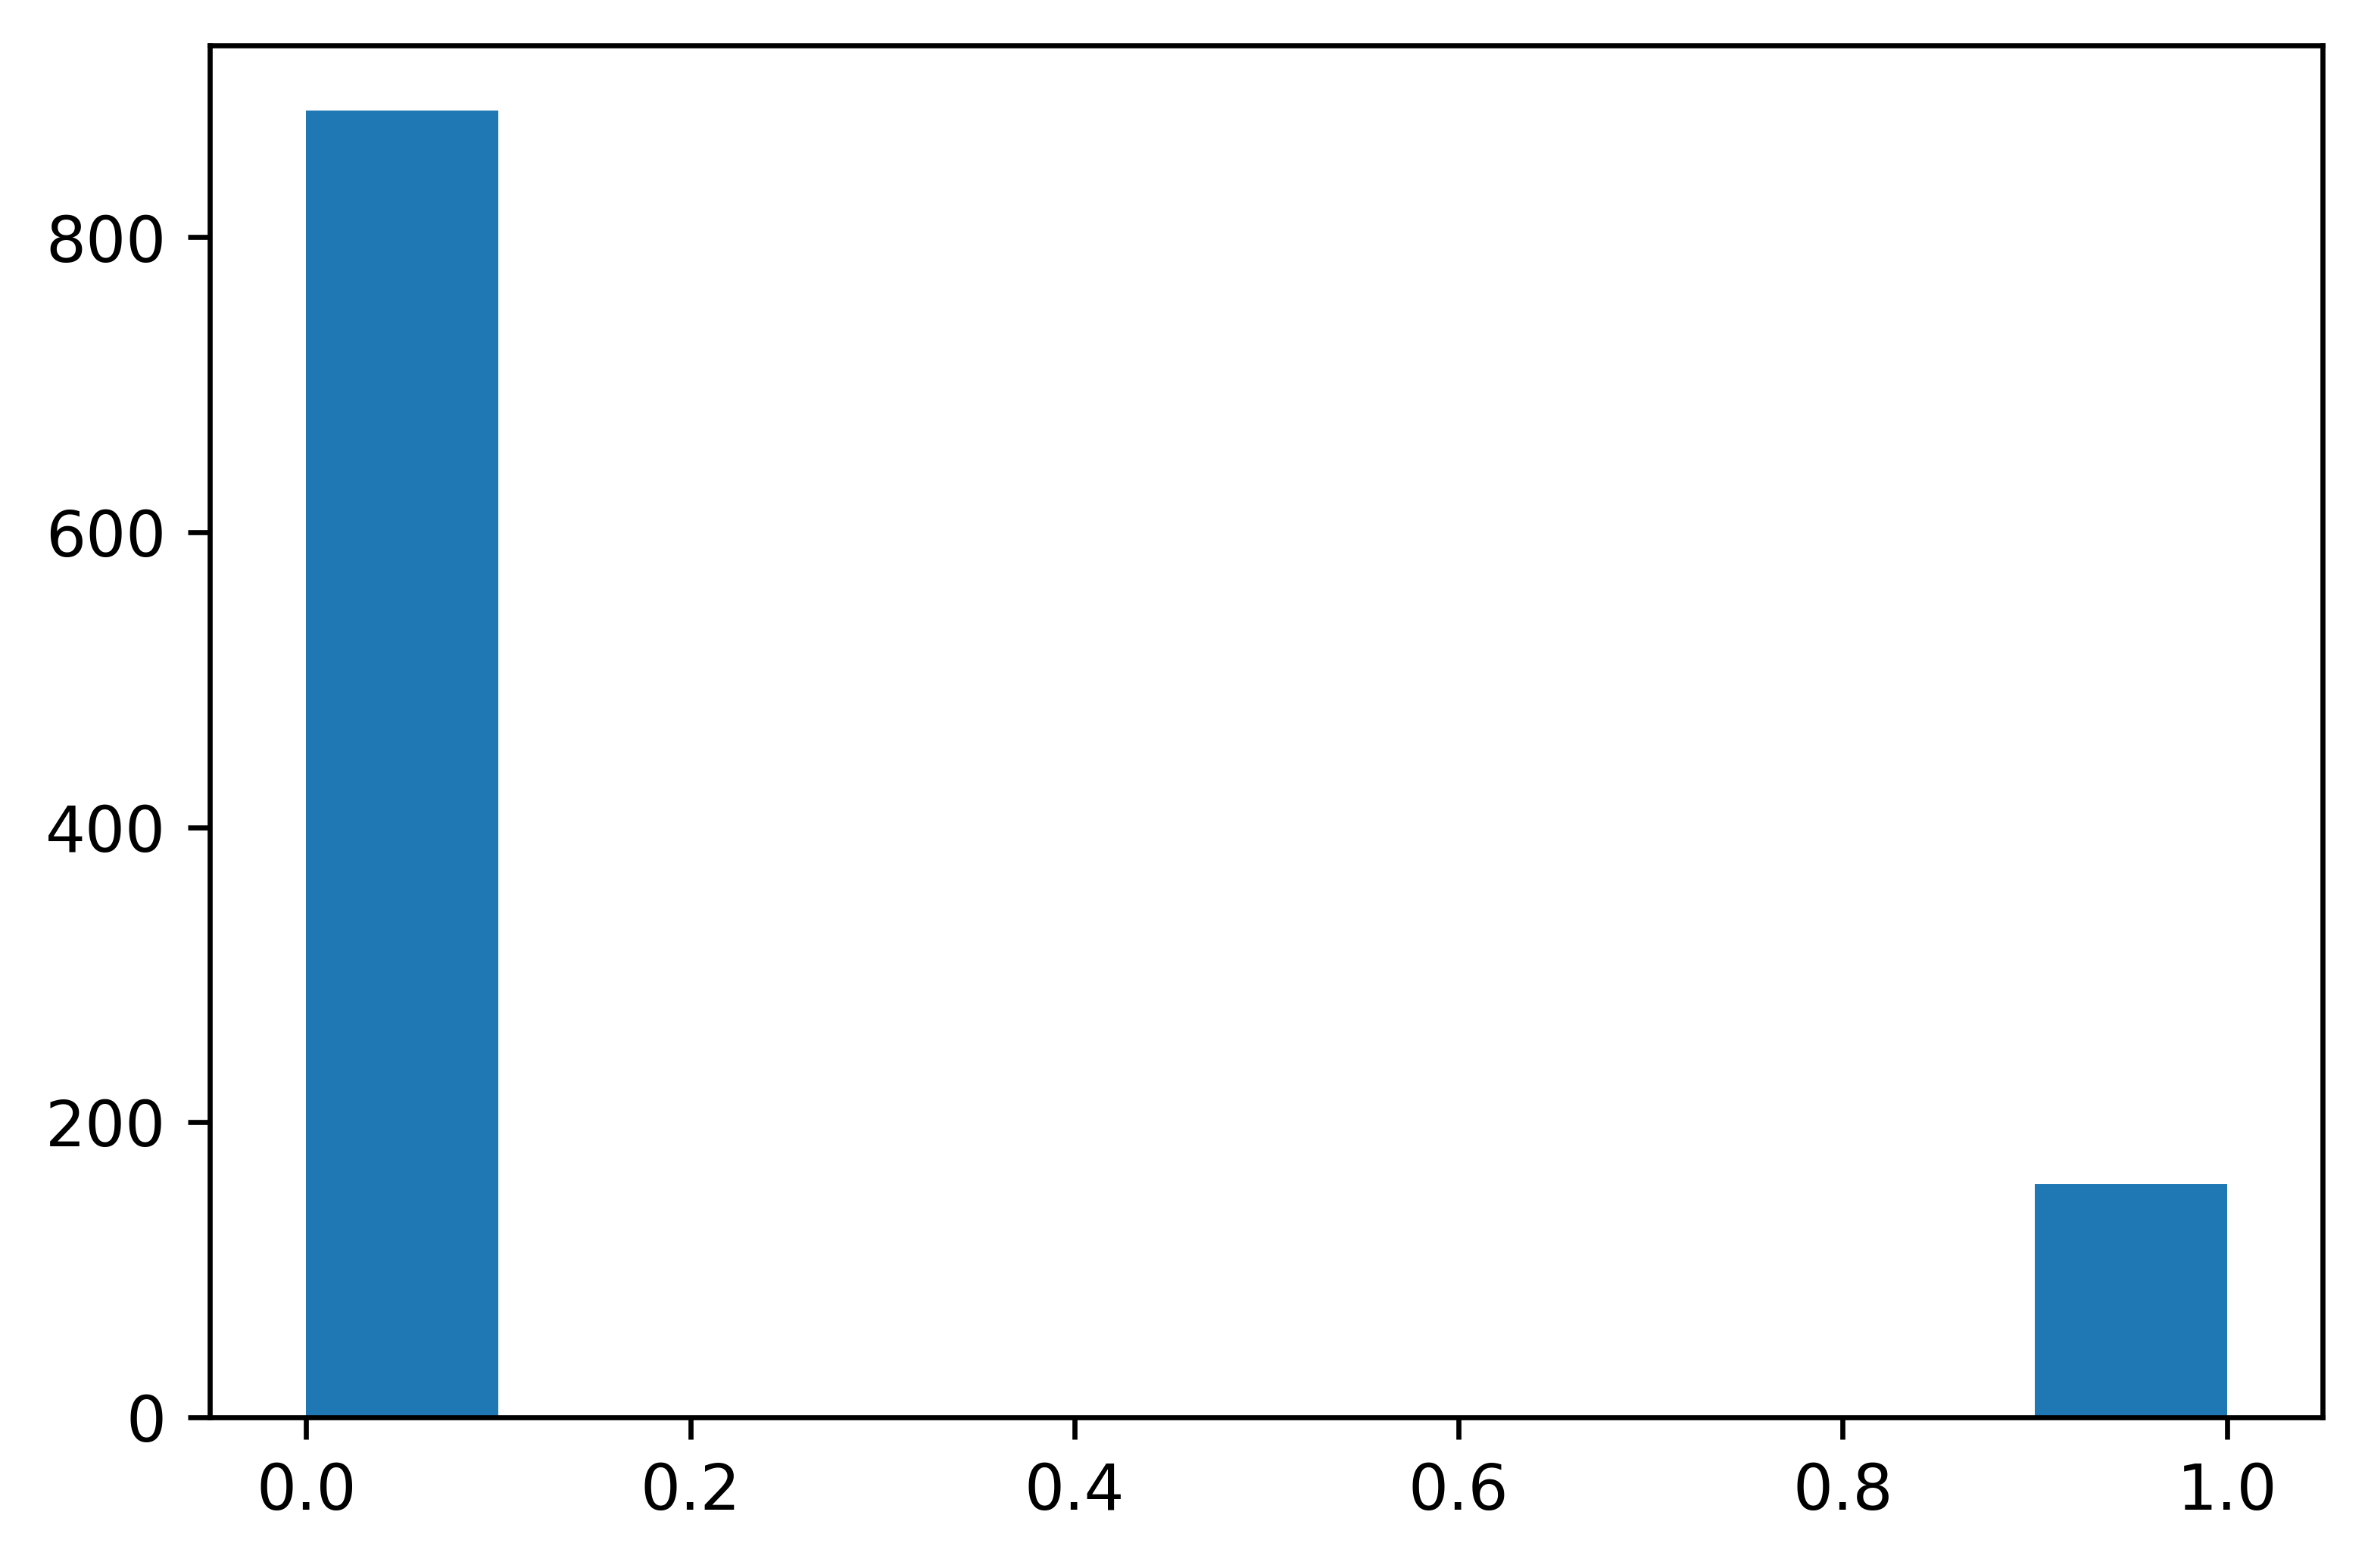

In [21]:
status_ok_int = stups_sf["status_ok"].astype(int)
plt.figure(dpi=600)
plt.hist(status_ok_int)

In [22]:
status_ok_int.value_counts()

0    886
1    158
Name: status_ok, dtype: int64